In [1]:
import pandas as pd
import matplotlib

In [49]:
# Historical Sales and Active Inventory

data = pd.read_csv('HistoricalSalesandActive Inventory.csv')
print(data.info())

print(data['date'].max())
print(data['date'].min())

print(data['store'].unique())
print(data['item'].unique())

print(data.head())

#filtering use all store, all item/sku and 3 years date
data = data[(data['date'] >= '2015-01-01') & (data['date'] < '2018-01-01')]
data = data[(data['item'] >0) & (data['item']< 10)]
data = data[data['store'] == 1]
print(data.head())
print(len(data))

#data.to_csv('HistoricalSalesandActive Inventory_3years_no_header.csv', header=False, index=False)
#data.to_csv('HistoricalSalesandActive Inventory_3years_.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None
2017-12-31
2013-01-01
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
           date  store  item  sales
730  2015-01-01      1     1     11
731  2015-01-02      1     1     19
732  2015-01-03      1     1     16
733  2015-01-04      1     1     14
734  2015-01-05     

In [50]:
print(data['date'].max())
print(data['date'].min())
## split training for 2,5 years and testing 6 months
data_training = data[(data['date'] >= '2015-01-01') & (data['date'] < '2017-07-01')]
data_testing = data[(data['date'] >= '2017-07-01') & (data['date'] < '2018-01-01')]

print('Training Date')
print(data_training['date'].min())
print(data_training['date'].max())
print('Testing Date')
print(data_testing['date'].min())
print(data_testing['date'].max())

2017-12-31
2015-01-01
Training Date
2015-01-01
2017-06-30
Testing Date
2017-07-01
2017-12-31


In [10]:
# data_training.to_csv('HistoricalSalesandActive Inventory_3years_training_no_header.csv', header=False, index=False)
# data_training.to_csv('HistoricalSalesandActive Inventory_3years_training_.csv', header=False, index=False)

# data_testing.to_csv('HistoricalSalesandActive Inventory_3years_testing_no_header.csv', header=False, index=False)
# data_testing.to_csv('HistoricalSalesandActive Inventory_3years_testing_.csv', header=False, index=False)

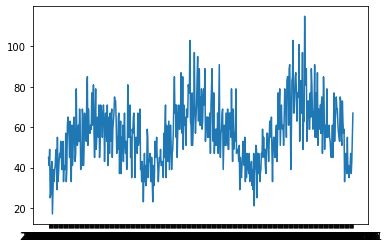

<Figure size 576x144 with 0 Axes>

In [51]:
#Visualize demand sales 
import matplotlib.pyplot as plt
%matplotlib inline
filter_data = data[ (data['store'] == 1) & (data['item'] == 2) & (data['sales'])] 
# filter_data = filter_data[(filter_data['date'] > '2017-01-01') & (filter_data['date'] < '2017-01-31')]
x = filter_data['date'] 
y = filter_data['sales']  
plt.plot(x, y)
plt.figure(figsize=(8, 2))
plt.show()

In [13]:
# evaluate an ARIMA model using a walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
#univariate dataset only use sales collumn
# split into train and test sets
# X = filter_data['sales'].values
# size = int(len(X) * 0.66)
# print(size)
# train, test = X[0:size], X[size:len(X)]
# print(len(train))
# print(len(test))
#     #convert to array 
# history = [x for x in train]
# predictions = list()

106
106
55


In [14]:
train = data_training['sales'].values
test = data_testing['sales'].values

print(len(train))
print(len(test))
    #convert to array 
history = [x for x in train]
predictions = list()

912
184


In [15]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=29.302170, expected=31.000000
predicted=30.314453, expected=38.000000
predicted=35.722956, expected=18.000000
predicted=31.922567, expected=23.000000
predicted=27.050982, expected=23.000000
predicted=26.606183, expected=31.000000
predicted=28.706920, expected=32.000000
predicted=28.576716, expected=27.000000
predicted=25.028233, expected=32.000000
predicted=27.800043, expected=16.000000
predicted=25.316632, expected=23.000000
predicted=26.906357, expected=29.000000
predicted=27.340238, expected=22.000000
predicted=25.134084, expected=38.000000
predicted=27.975874, expected=40.000000
predicted=28.267340, expected=36.000000
predicted=31.255554, expected=20.000000
predicted=28.649741, expected=26.000000
predicted=29.245005, expected=24.000000
predicted=30.934563, expected=37.000000
predicted=32.675204, expected=27.000000
predicted=28.531662, expected=35.000000
predicted=28.118180, expected=32.000000
predicted=29.721709, expected=27.000000
predicted=29.636586, expected=20.000000


Test RMSE: 6.261


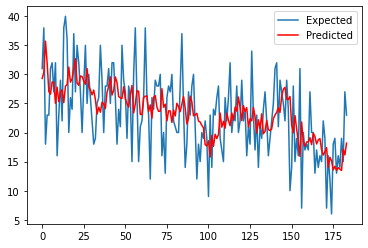

In [16]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test, label='Expected')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

In [19]:
# xgboost
from xgboost import XGBRegressor
import numpy
from sklearn.metrics import mean_absolute_error

In [40]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [42]:
# load the dataset
series1 = data_training.loc[:, data_training.columns != 'date']
series2 = data_testing.loc[:, data_training.columns != 'date']
values_training = series1.values
values_testing = series2.values
# transform the time series data into supervised learning
data_training_transform = series_to_supervised(values_training, n_in=6)
data_testing_transform = series_to_supervised(values_testing, n_in=6)
print(data_training_transform)

[[ 1.  1. 11. ...  1.  1. 13.]
 [ 1.  1. 19. ...  1.  1. 18.]
 [ 1.  1. 16. ...  1.  1. 18.]
 ...
 [ 1.  1. 24. ...  1.  1. 50.]
 [ 1.  1. 26. ...  1.  1. 28.]
 [ 1.  1. 30. ...  1.  1. 28.]]


In [43]:
# transform the time series data into supervised learning
def xgboost_forecast(train, testX):
	# transform list into array
	train = numpy.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(train,test):
	predictions = list()
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	# error = mean_absolute_error(test[:, -1], predictions)
	error = sqrt(mean_squared_error(test[:, -1], predictions))
	
	return error, test[:, -1], predictions
	

>expected=32.0, predicted=25.1
>expected=27.0, predicted=33.1
>expected=32.0, predicted=18.2
>expected=16.0, predicted=31.3
>expected=23.0, predicted=23.9
>expected=29.0, predicted=35.1
>expected=22.0, predicted=15.9
>expected=38.0, predicted=30.2
>expected=40.0, predicted=32.5
>expected=36.0, predicted=27.9
>expected=20.0, predicted=24.2
>expected=26.0, predicted=27.3
>expected=24.0, predicted=20.6
>expected=37.0, predicted=30.4
>expected=27.0, predicted=26.7
>expected=35.0, predicted=27.7
>expected=32.0, predicted=29.3
>expected=27.0, predicted=17.4
>expected=20.0, predicted=22.8
>expected=28.0, predicted=26.3
>expected=35.0, predicted=24.6
>expected=25.0, predicted=24.7
>expected=30.0, predicted=17.7
>expected=26.0, predicted=26.4
>expected=22.0, predicted=19.5
>expected=18.0, predicted=28.3
>expected=19.0, predicted=27.7
>expected=25.0, predicted=25.6
>expected=26.0, predicted=22.5
>expected=35.0, predicted=22.1
>expected=29.0, predicted=24.1
>expected=20.0, predicted=21.8
>expecte

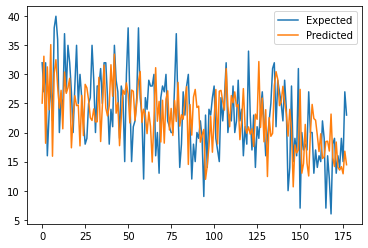

In [44]:
## evaluate XGBOOST
error, y, yhat = walk_forward_validation(data_training_transform,data_testing_transform)
print('RMSE: %.3f' % error)
# plot expected vs preducted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()